In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()
pd.set_option('display.max_columns', None)
PATH_TO_DATASET = './MBD'

In [3]:
geo = pd.read_parquet(path=os.path.join(PATH_TO_DATASET, 'detail/geo/fold=0'))

In [4]:
print(geo.shape)
geo.head()

(13814561, 5)


,client_id,event_time,geohash_4,geohash_5,geohash_6
0,397d52b11ce72699a5482e5397f63a03af1636c85e9e61...,2022-03-25 13:39:51.569288,41342,406579,1018528
1,397d52b11ce72699a5482e5397f63a03af1636c85e9e61...,2022-06-11 07:21:32.505485,41342,406579,1018528
2,397d52b11ce72699a5482e5397f63a03af1636c85e9e61...,2022-08-08 21:25:07.461323,41342,406579,1018528
3,397d52b11ce72699a5482e5397f63a03af1636c85e9e61...,2022-07-23 11:32:03.433401,41342,406579,1018528
4,397d52b11ce72699a5482e5397f63a03af1636c85e9e61...,2022-05-28 08:18:19.843885,41342,406579,1018528


In [5]:
geo.isna().sum()

client_id     0
event_time    0
geohash_4     0
geohash_5     0
geohash_6     0
dtype: int64

In [6]:
geo['client_id'].nunique()

14863

The table contains infromation about 14863 unique clients

In [7]:
arr = geo.groupby('client_id')[['geohash_4', 'geohash_5', 'geohash_6']].nunique()
arr.describe()

,geohash_4,geohash_5,geohash_6
count,14863.000000,14863.000000,14863.000000
mean,12.551638,31.399045,80.245913
std,12.862737,33.001187,87.960074
min,1.000000,1.000000,1.000000
25%,5.000000,11.000000,25.000000
50%,9.000000,23.000000,57.000000
75%,16.000000,41.000000,106.000000
max,305.000000,1318.000000,3374.000000


Each client has entries with an avarage of 12.55 unique geohashes of level 4; 31.40 level-5 geohashes; 80.25 level-6 geohashes. \
At most clients have entries from 305, 1318 and 3374 unique geohashes respectively.

Text(0.5, 1.0, 'Distribution of the number of unique visited level-4 geohashes per client')

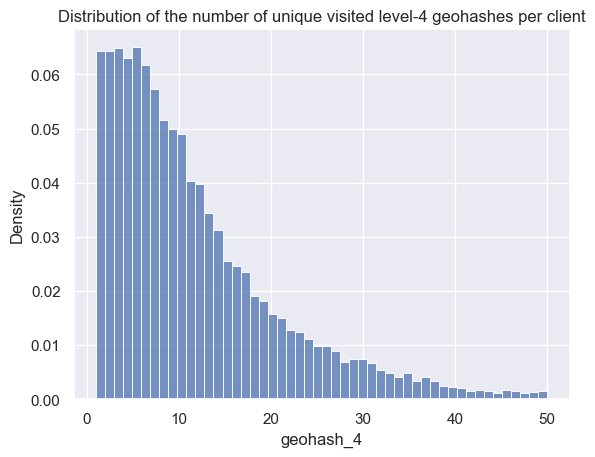

In [8]:
ax = sns.histplot(data=arr, x='geohash_4', binrange=(1, 50), stat='density')
ax.set_title('Distribution of the number of unique visited level-4 geohashes per client')

Text(0.5, 1.0, 'Distribution of the number of unique visited level-5 geohashes per client')

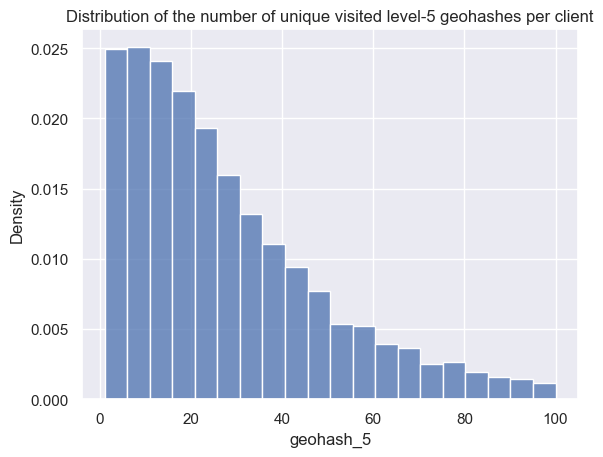

In [9]:
ax = sns.histplot(data=arr, x='geohash_5', bins=20, binrange=(1, 100), stat='density')
ax.set_title('Distribution of the number of unique visited level-5 geohashes per client')

Text(0.5, 1.0, 'Distribution of the number of unique visited level-6 geohashes per client')

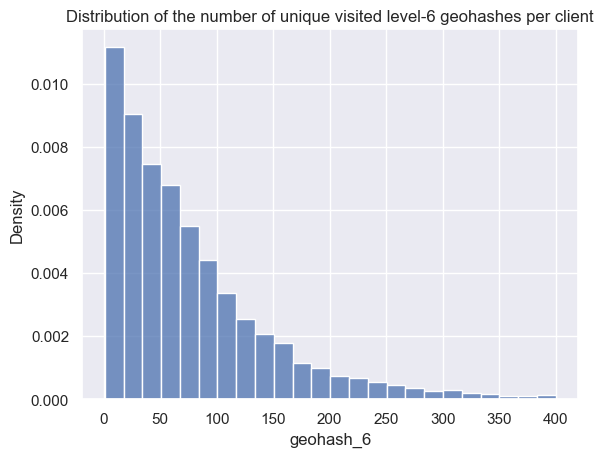

In [10]:
ax = sns.histplot(data=arr, x='geohash_6', bins=24, binrange=(1, 400), stat='density')
ax.set_title('Distribution of the number of unique visited level-6 geohashes per client')

In [11]:
arr = geo[['geohash_4', 'geohash_5', 'geohash_6']].nunique()

Text(0.5, 1.0, 'Number of unique geohashes per each level')

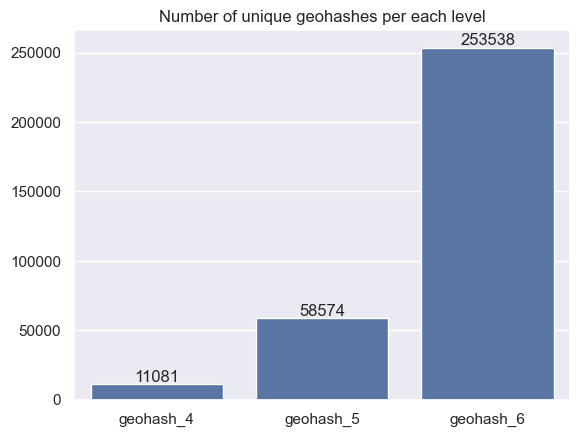

In [12]:
ax = sns.barplot(data=arr)
ax.bar_label(ax.containers[0])
ax.set_title('Number of unique geohashes per each level')

In [13]:
geo.groupby('geohash_4')['geohash_5'].nunique().describe()

count    11081.000000
mean         5.285985
std          5.787472
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         32.000000
Name: geohash_5, dtype: float64

In [14]:
arr = geo.groupby('geohash_4')['geohash_5'].nunique()
arr.describe()

count    11081.000000
mean         5.285985
std          5.787472
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         32.000000
Name: geohash_5, dtype: float64

Each level-4 geohash on average contains entries about 5.29 unique level-5 geohashes.

Text(0.5, 1.0, 'Distribution of the number of unique level-5 geohashes within each level-4 geohash')

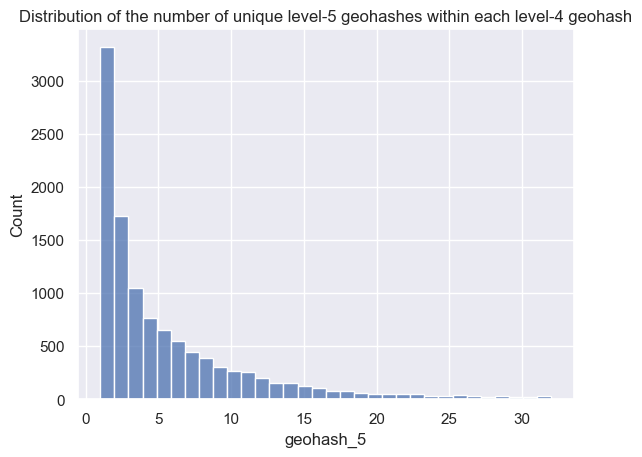

In [15]:
ax = sns.histplot(arr, bins=32)
ax.set_title('Distribution of the number of unique level-5 geohashes within each level-4 geohash')

In [16]:
arr = geo.groupby('geohash_5')['geohash_6'].nunique()
arr.describe()

count    58574.000000
mean         4.328508
std          5.413452
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         32.000000
Name: geohash_6, dtype: float64

Each level-5 geohash on average contains entries about 4.33 unique level-6 geohashes

Text(0.5, 1.0, 'Distribution of the number of unique level-6 geohashes within each level-5 geohash')

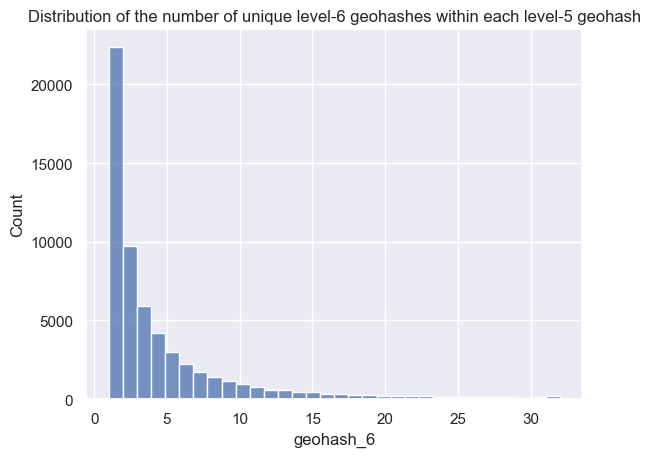

In [17]:
ax = sns.histplot(arr, bins=32)
ax.set_title('Distribution of the number of unique level-6 geohashes within each level-5 geohash')

In [18]:
arr = geo.groupby('geohash_4')['event_time'].count()
arr.describe()

count     11081.000000
mean       1246.689017
std       14765.951156
min           1.000000
25%           3.000000
50%          16.000000
75%         110.000000
max      850406.000000
Name: event_time, dtype: float64

On average every level-4 geohash has 1,246.69 entries with a maximum of 850,406

Text(0.5, 1.0, 'Distribution of the number of events occured within each level-4 geohash')

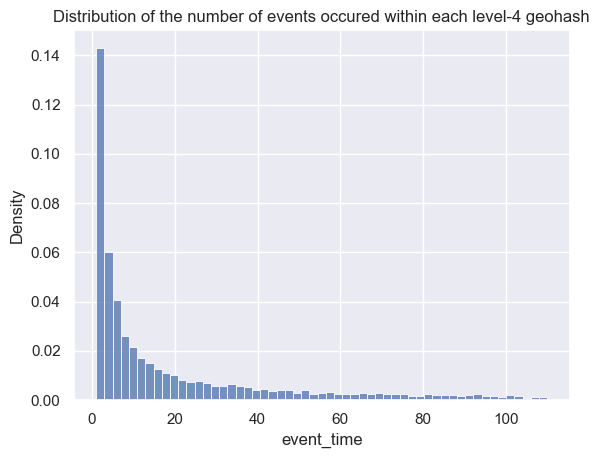

In [19]:
arr = geo.groupby('geohash_4')['event_time'].count()
ax = sns.histplot(arr[arr.values <= 110], bins=55, stat='density')
ax.set_title('Distribution of the number of events occured within each level-4 geohash')

In [20]:
arr = geo.groupby('geohash_5')['event_time'].count()
arr.describe()

count    58574.000000
mean       235.848004
std       1859.769106
min          1.000000
25%          2.000000
50%          5.000000
75%         27.000000
max      94860.000000
Name: event_time, dtype: float64

On average every level-5 geohash has 235.85 entries with a maximum of 94,860

Text(0.5, 1.0, 'Distribution of number of events occured within each level-5 geohash')

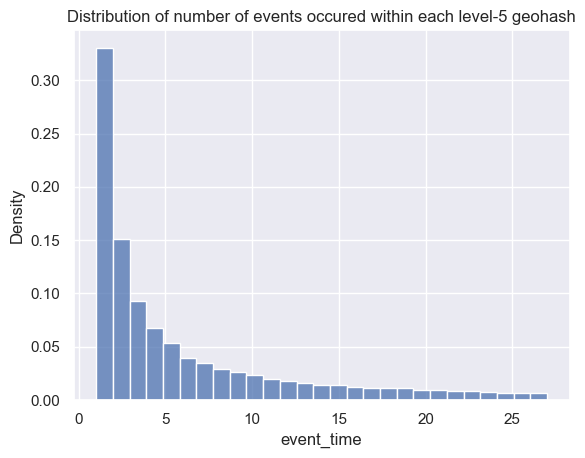

In [21]:
arr = geo.groupby('geohash_5')['event_time'].count()
ax = sns.histplot(arr, bins=27, binrange=(1, 27), stat='density')
ax.set_title('Distribution of number of events occured within each level-5 geohash')

In [22]:
arr = geo.groupby('geohash_6')['event_time'].count()
arr.describe()

count    253538.000000
mean         54.487142
std         243.852653
min           1.000000
25%           1.000000
50%           3.000000
75%          14.000000
max       12510.000000
Name: event_time, dtype: float64

On average every level-6 geohash has 54.49 entries with a maximum of 12,510

Text(0.5, 1.0, 'Distribution of the number of events occured within each level-6 geohash')

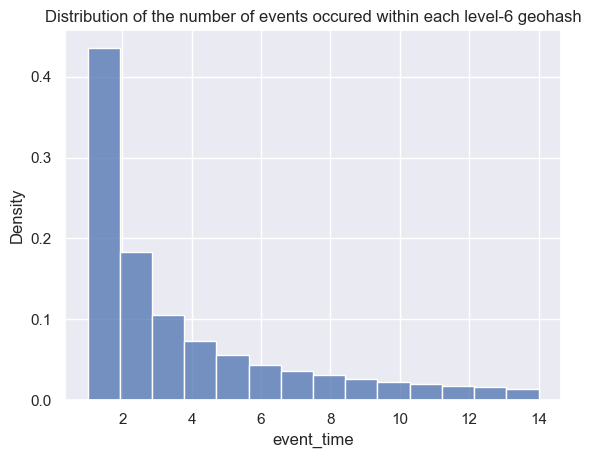

In [23]:
arr = geo.groupby('geohash_6')['event_time'].count()
ax = plt.subplot()
ax = sns.histplot(ax=ax, data=arr, bins=14, binrange=(1, 14), stat='density')
ax.set_title('Distribution of the number of events occured within each level-6 geohash')

**Number of unique clients within each geohash**

In [24]:
arr = geo.groupby('geohash_4')['client_id'].nunique()
arr.describe()

count    11081.000000
mean        16.835574
std        105.196571
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       4953.000000
Name: client_id, dtype: float64

In [25]:
arr.median(), arr.mode()

(3.0,
 0    1
 Name: client_id, dtype: int64)

Text(0.5, 1.0, 'Distribution of the number of unique clients within each level-4 geohash')

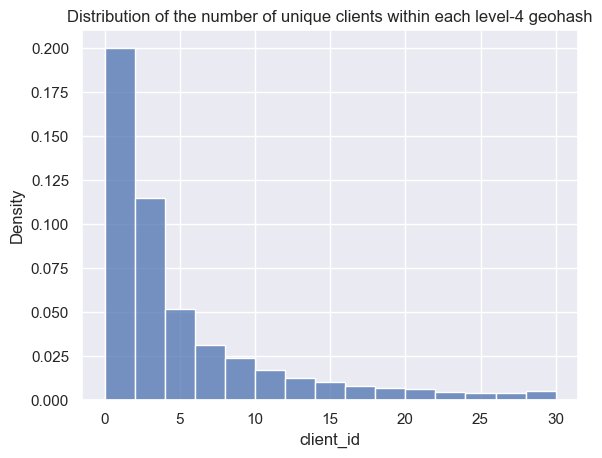

In [26]:
ax = plt.subplot()
ax = sns.histplot(ax=ax, data=arr, stat='density', binrange=(0, 30), bins=15)
ax.set_title('Distribution of the number of unique clients within each level-4 geohash')

In [27]:
arr = geo.groupby('geohash_5')['client_id'].nunique()
arr.describe()

count    58574.000000
mean         7.967426
std         45.628213
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       2936.000000
Name: client_id, dtype: float64

In [28]:
arr.median(), arr.mode()

(2.0,
 0    1
 Name: client_id, dtype: int64)

Text(0.5, 1.0, 'Distribution of the number of unique clients within each level-5 geohash')

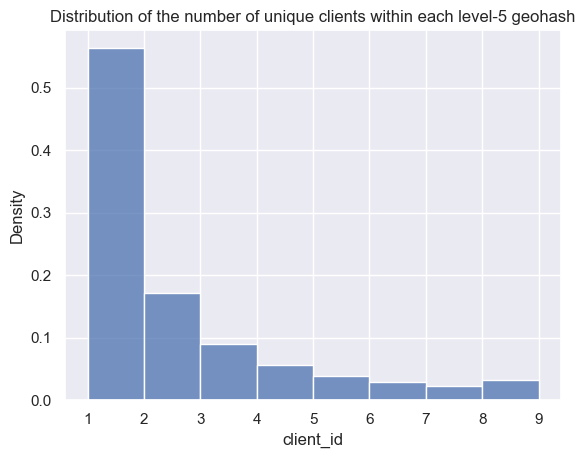

In [29]:
ax = plt.subplot()
ax = sns.histplot(
    ax=ax, 
    data=arr, 
    stat='density', 
    binrange=(1, 9), 
    bins=8, 
)
ax.set_title('Distribution of the number of unique clients within each level-5 geohash')

In [30]:
arr = geo.groupby('geohash_6')['client_id'].nunique()
arr.describe()

count    253538.000000
mean          4.704206
std          15.350892
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         818.000000
Name: client_id, dtype: float64

In [31]:
arr.nunique()

333

In [32]:
arr.median()

1.0

In [33]:
arr.mode()

0    1
Name: client_id, dtype: int64

Text(0.5, 1.0, 'Distribution of the number of unique clients within each level-6 geohash')

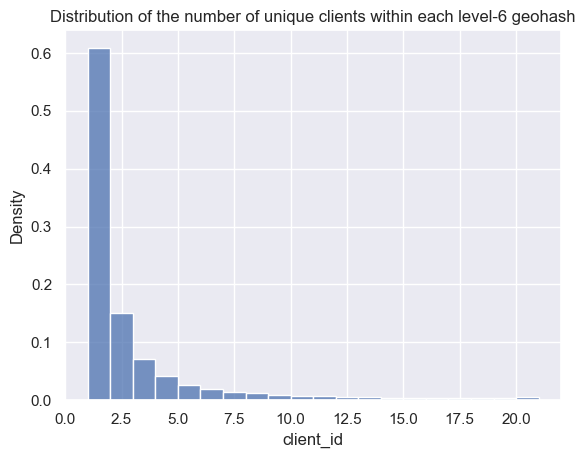

In [34]:
ax = plt.subplot()
ax = sns.histplot(
    ax=ax, 
    data=arr, 
    stat='density', 
    binrange=(1, 21), 
    bins=20, 
)
ax.set_title('Distribution of the number of unique clients within each level-6 geohash')